<a href="https://colab.research.google.com/github/nayonsoso/hg-mldl/blob/main/Ch03_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 특성 공학과 규제

세가지 특성 <길이, 높이, 두께>로 농어의 <무게>를 예측해보자.

여러 x로 하나의 y를 예측하므로 다중 회귀(polynomail regression)를 사용할 수 있다.

특성이 많을수록 더 복잡하고 정교한 모델을 만들 수 있으므로

기존의 특성을 사용해 새로운 특성을 뽑아내는 **특성 공학**(feature engineering)을 이용하도록 하자.

## 특성 공학이란?

본 교재에서는 특성끼리 곱하여 새로운 특성을 만들지만, 이것이 특성 공학의 본질은 아니다.

특성 공학은 '도메인 지식을 활용하여 특성(Feature)를 만들어내는 과정'으로

**기존 특성을 더 간단한 방식으로 표현하여 문제를 쉽게 만드는 것**에 의의가 있다.

중요도에 따라 특징을 선정하거나, 연속형 변수를 범주형 변수로 변환하는 등 특성 공학의 방법은 다양하다.

참고 : https://codebaragi23.github.io/books/DeepLearningFromKeras/Part1/Chapter4/4.3/

https://itwiki.kr/w/%ED%8A%B9%EC%84%B1_%EA%B3%B5%ED%95%99

## 데이터 준비

pandas로 csv 파일을 불러와서 

numpy 배열로 바꿔주면 csv파일을 이용해 모델을 학습시킬 수 있다.

-> 웹에서 데이터를 바로 다운받아 사용할 수 있음

cf. cvs란 comma-separated values의 약자로서 각 라인의 컬럼들이 콤마로 분리된 텍스트 파일 포맷이다. 

(참고 : http://pythonstudy.xyz/python/article/207-CSV-%ED%8C%8C%EC%9D%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0)



In [ ]:
import pandas as pd

# pandas 로 csv 불러오기 (data frame으로 변환됨)
df = pd.read_csv('https://bit.ly/perch_csv_data')

# data frame을 넘파이 배열로 바꿔주기
perch_full = df.to_numpy()

# 농어 데이터 확인
print(perch_full[:3])

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]]


In [ ]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [ ]:
# 훈련 세트 테스트 세트 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

print('train_input :', train_input.shape, 'test_input :',test_input.shape, 'train_target :',train_target.shape, 'test_target :',test_target.shape)

train_input : (42, 3) test_input : (14, 3) train_target : (42,) test_target : (14,)


## 사이킷런의 변환기

사이킷 런은 **특성을 만들거나 전처리**하기 위한 클래스를 제공하는데,

이를 변환기(transformer)라고 부른다.

변환기 클래스는 모두 fit( ), transform( ) 메서드를 제공한다. (모델의 fit과 다르다는 점 주의!)

본 실습에서 사용할 변환기는 **PolynomialFeatures** 이다.

PolynomialFeatures는 fit( )으로 주어진 특성에 대해

특성 원본, 특성을 제곱한 것, 특성끼리 곱한 것을 transform( )으로 반환하게 하는 반환기이다.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# 객체 생성
poly = PolynomialFeatures()

# fit에 특성 전달 - 조합 찾음
poly.fit([[2, 3]])

# transform으로 원본, 제곱, 서로의 곱을 출력
print(poly.transform([[2, 3]]))

# 1은 절편, 2와 3은 특성, 4와 9는 각 특성 제곱, 6은 특성 간 곱

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
# 절편을 의미하는 1 제외
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))
# cf. include_bias=False 를 하지 않아도 사이킷런 모델은 자동으로 절편 항을 무시하긴 함

[[2. 3. 4. 6. 9.]]


In [ ]:
# 농어 데이터에 적용
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

train_input의 shape은 (42, 3)인데 transform을 적용한 train_poly는 

[ 길이, 높이, 두께, 길이^2, 높이^2, 두께^2, 길이x높이, 길이x두께, 높이x두께 ]

가 되므로 특성이 9개로 늘어난다.


In [ ]:
print(train_poly.shape)

(42, 9)


In [ ]:
# 조합 확인
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [ ]:
# 테스트 인풋에도 적용
# 앞에 한 fit의 조합이 그대로 이용되므로 fit은 생략해도 됨
test_poly = poly.transform(test_input)

## 다중 회귀 모델 훈련하기

복습 ) 다중 회귀는 특성이 여러개인 '선형 회귀'이므로 모델 생성, 학습에 LinearRegression 라이브러리를 사용한다.

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lr.score(train_poly, train_target))

0.9903183436982124


In [ ]:
print(lr.score(test_poly, test_target))
# 과소적합 해결

0.9714559911594132


여러 특성을 이용했더니 다중 회귀 모델의 성능이 좋아짐을 확인할 수 있었다.

PolynomialFeatures 변환기의 옵션인 degree를 이용하여 최고차항을 늘려서

특성의 개수가 많아지면 항상 성능이 좋아지는지를 확인해보자.

In [ ]:
# 최고차항의 차수를 5로 설정
poly = PolynomialFeatures(degree=5, include_bias=False)

# fit으로 조합 만들기
poly.fit(train_input)

# transform으로 특성 늘리기
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# 메서드 체이닝을 이용하면 아래처럼 표현하기도 함
# train_poly = poly.fit(train_input).transform(train_input)
# 같은 의미의 더 효율적인 메서드
# train_poly = poly.fit_transform(train_input)

In [ ]:
print(train_poly.shape)
# 특성의 개수가 55개로 늘어남

(42, 55)


In [ ]:
# 다중 회귀 모델 학습
lr.fit(train_poly, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lr.score(train_poly, train_target))

0.9999999999991096


In [ ]:
print(lr.score(test_poly, test_target))
# 심한 과대적합 발생

-144.40579242335605


특성의 개수가 많아지면 더욱 복잡한 모델이 되어 성능이 올라가는 것은 사실이지만,

특성의 개수가 지나치게 많아지면 훈련 세트에 대해서만 과하게 학습하게 되므로 과대적합 문제가 발생한다.

## 규제 regularization


규제란? 학습을 방해해 과대적합 방지하는 것.

특히 선형회귀에서는 특성에 **곱해지는 계수(또는 기울기)의 크기를 작게 만드는 것**

ex. 기울기를 줄이면 경사가 원만해지므로, 덜 구체적인 모델이 될 수 있다.

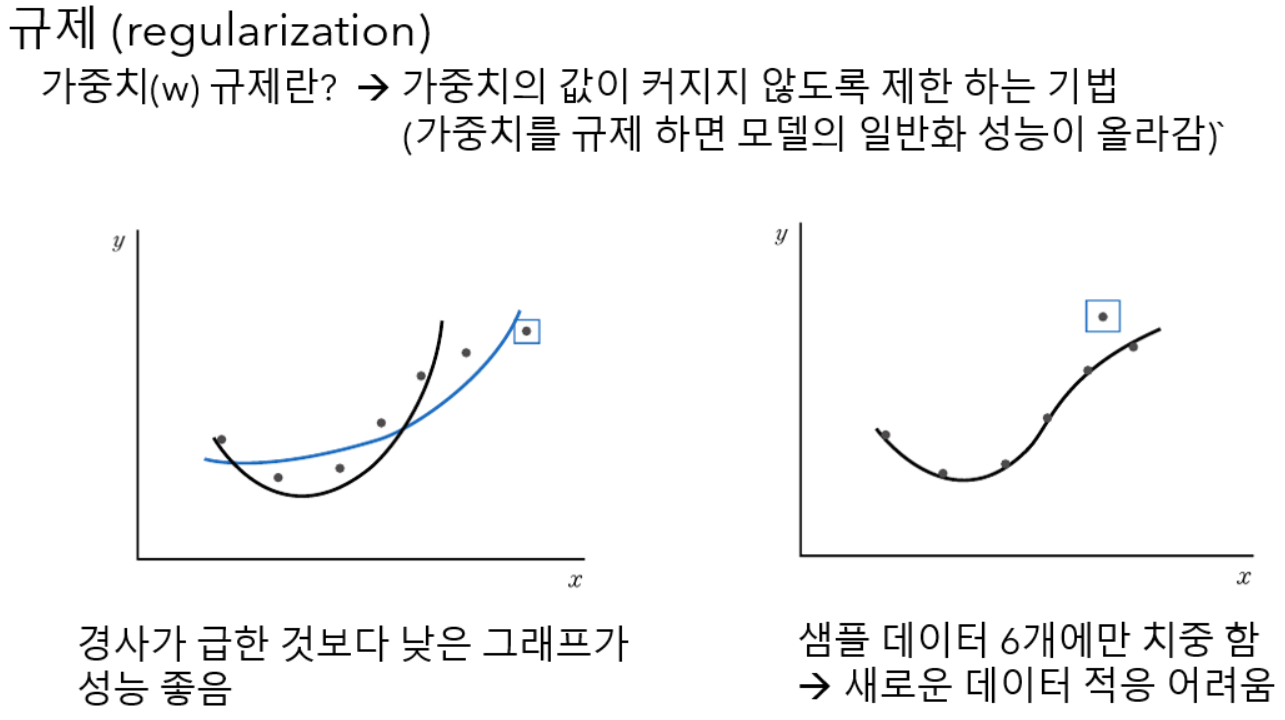

( 이미지 출처 : https://rdmkyg.blogspot.com/2021/06/regularization-l1.html )

### 스케일 일치 (=정규화)

규제란, 파라미터에 곱해지는 계수를 줄이는 것이라는 것을 다시 생각해보자.

이때 파라미터마다 스케일이 다르므로 일정한 계수를 곱한다면 공정하게 제어되지 않을 수 있다.

따라서 정규화의 과정이 먼저 필요하다.

2장에서는 평균과 표준편차를 구하 Z점수(=표준점수)로 바꿨지만 여기선 **StandardScaler** 클래스 사용한다.

StandardScaler 클래스는 전달된 특성이 평균 0, 분산 1이 되도록 정규화 시켜준다.

StandardScaler 클래스 역시 변환기 이므로 fit, transform 을 제공한다.

※ 동일한 기준이 적용되야 하므로 훈련세트로 학습한 변환기를 사용해 테스트세트까지 변환해야함!!

( 참고 : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=demian7607&logNo=222009975984 )

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 선형 회귀 모델에 규제 적용 

선형 회귀 모델에 규제를 추가한 모델에는 릿지(ridge)와 라쏘(lasso)가 있다.

**릿지**는 계수를 제곱한 값을 기준으로 규제를 적용하고,

**라쏘**는 계수의 절댓값을 기준으로 규제를 적용한다.

- 일반적으로 릿지를 더 선호한다.
- 두 알고리즘 모두 계수의 크기를 줄이지만, 라쏘는 아예 0으로 만들 수 있다.
- 릿지와 라쏘 모두 규제의 양을 alpha 매개변수로 조절할 수 있다.

### 릿지 회귀 Ridge

계수를 제곱한 값을 기준으로 규제를 적용한다.

본 실습에서는 원리까지는 배우지 않고 활용만 해본다.


In [ ]:
# 선형 회귀에 규제를 적용하여 릿지 모델을 만듦으로 linear_model 패키지 안에 있음
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)

0.9896101671037343


In [ ]:
print(ridge.score(train_scaled, train_target))

In [ ]:
print(ridge.score(test_scaled, test_target))
# 과대적합 해결

0.9790693977615398


**alpha 매개변수란?** 

머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터이므로 '하이퍼 파라미터'이다.


alpha 값이 커지면 규제의 강도가 세져서 기울기가 줄어들고 과소 적합된다.

반대로 alpha 값이 작으면 규제의 강도가 약해져 과대 적합이 될 수 있다.

따라서 과대 적합과 과소 적합이 가장 적게 일어날 때 

즉, 훈련 세트와 테스트 세트의 점수가 가장 비슷할 때가 최적의 alpha 값이 된다.

적절한 alpha 값을 찾기 위해 훈련 세트와 테스트 세트의 R^2 그래프를 그려보자.

복습) R^2 값은 회귀에서 평가 점수로 사용되는 지표

In [ ]:
import matplotlib.pyplot as plt

# 알파 값에 따른 점수 저장할 배열
train_score = []
test_score = []

# 알파 값
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # 릿지 모델 생성
    ridge = Ridge(alpha=alpha)
    # 릿지 모델 훈련
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

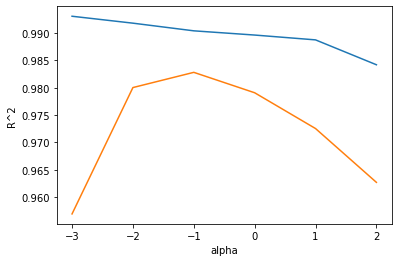

In [ ]:
plt.plot(np.log10(alpha_list), train_score, color='blue')
plt.plot(np.log10(alpha_list), test_score, color='orange')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

그래프 왼쪽 : 훈련세트와 테스트세트 점수차가 심한 과대적합


그래프 오른쪽 : 두 세트 모두 점수가 낮은 과소적합

두 세트의 점수가 가장 가까우면서 테스트 세트 점수가 가장 높은 곳은 

log10(alpha)가 -1 즉, alpha = 0.1 일 때이다.

In [ ]:
# 최적의 알파값으로 모델 생성 - 최적의 규제 적용
ridge = Ridge(alpha=0.1)
# 모델 훈련
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))
# 과대 적합, 과소 적합 사이에 균형이 잡힌 높은 점수가 나옴

0.9903815817570366
0.9827976465386927


### 라쏘 회귀 Lasso

계수의 절댓값을 기준으로 규제를 적용한다.

릿지 모델과 사용법이 동일하다.

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.9897898972080961


In [ ]:
print(lasso.score(test_scaled, test_target))
# 과대적합 해결

0.9800593698421883


In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 모델 생성
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 모델 훈련
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


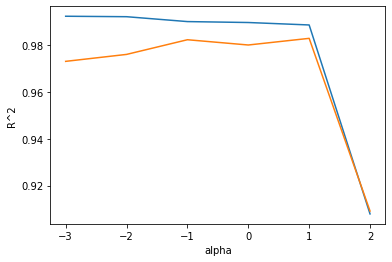

In [ ]:
plt.plot(np.log10(alpha_list), train_score, color='blue')
plt.plot(np.log10(alpha_list), test_score, color='orange')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

그래프 왼쪽 : 훈련세트와 테스트세트 점수차가 심한 과대적합

그래프 오른쪽 : 두 세트 모두 점수가 낮은 과소적합

두 세트의 점수가 가장 가까우면서 테스트 세트 점수가 가장 높은 곳은 

log10(alpha)가 1 즉, alpha = 10 일 때이다.

In [ ]:
# 최적의 알파값으로 모델 생성 - 최적의 규제 적용
lasso = Lasso(alpha=10)
# 모델 훈련
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))
# 과대 적합, 과소 적합 사이에 균형이 잡힌 높은 점수가 나옴

0.9888067471131867
0.9824470598706695


라쏘 모델에서 계수가 0이 되었다는 것은 해당 계수를 사용하지 않았다는 뜻이다.

즉, 유용한 특징을 어느정도로 골라냈는지에 대한 척도로 사용될수도 있다.

In [ ]:
print(np.sum(lasso.coef_ == 0))

40
